In [1]:
import shap
import sklearn

# util
from xaibenchmark import load_adult as la

In [2]:
X,y = shap.datasets.adult()

In [3]:
data = la.load_csv_data('adult', root_path='../data')
data.data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
13898,42,Federal-gov,91468,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States
5810,25,Private,276310,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico
8871,29,Private,190350,12th,8,Never-married,Other-service,Unmarried,Black,Female,0,0,35,NaN
12995,19,Self-emp-not-inc,305834,Some-college,10,Never-married,Craft-repair,Own-child,White,Female,0,0,25,United-States
13109,34,Private,737315,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,47,Private,168283,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
7759,41,Private,49654,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,52,United-States
2329,32,Private,236770,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,50,United-States
12711,48,Private,168216,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States


In [4]:
X_display,y_display = shap.datasets.adult(display=True)
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

In [5]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [6]:
f = lambda x: rf.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))

In [7]:
med

array([[37.,  4., 10.,  2.,  7.,  3.,  4.,  1.,  0.,  0., 40., 39.]])

In [8]:
explainer = shap.Explainer(f, med)
shap_values = explainer(X_valid.iloc[0:1000,:])

Permutation explainer: 1001it [15:03,  1.10it/s]                          


In [14]:
shap.plots.__dict__.keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__path__', '__file__', '__cached__', '__builtins__', '_labels', 'colors', '_utils', '_bar', 'bar', '_heatmap', 'heatmap', '_decision', 'decision', '_scatter', 'scatter', '_embedding', 'embedding', '_force_matplotlib', '_force', 'force', 'initjs', '_group_difference', 'group_difference', '_image', 'image', 'image_to_text', '_monitoring', 'monitoring', '_partial_dependence', 'partial_dependence', '_beeswarm', 'beeswarm', '_violin', 'violin', '_text', 'text', '_waterfall', 'waterfall'])

In [44]:
rf.predict([X_valid.iloc[0]])

array([False])

In [45]:
rf.predict_proba([X_valid.iloc[0]])

array([[0.9955, 0.0045]])

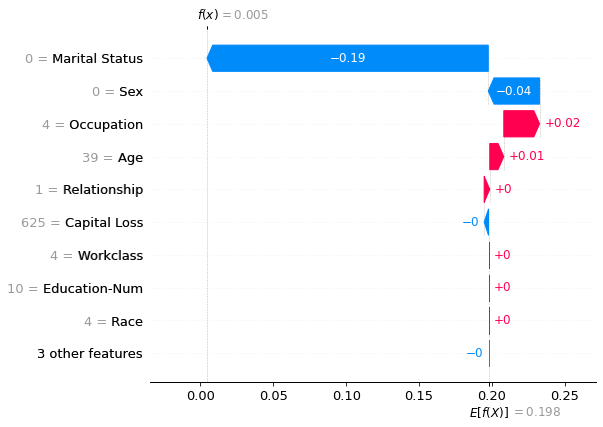

In [47]:
shap.plots.waterfall(shap_values[0])

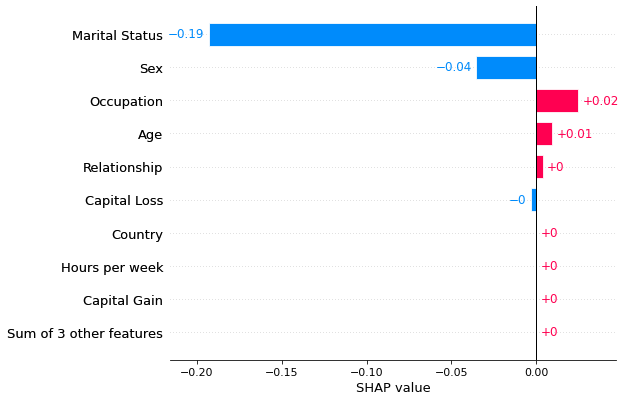

In [19]:
shap.plots.bar(shap_values[0])

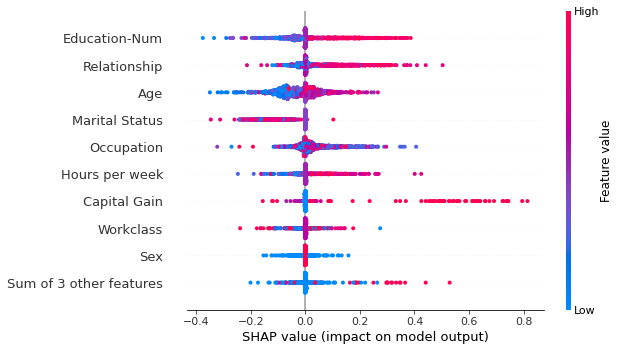

In [20]:
shap.plots.beeswarm(shap_values)

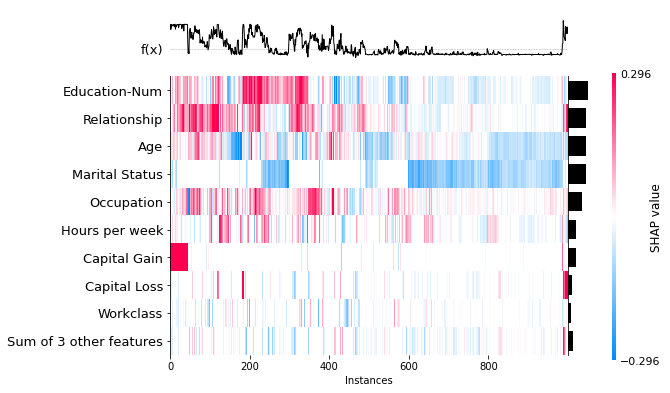

In [21]:
shap.plots.heatmap(shap_values)

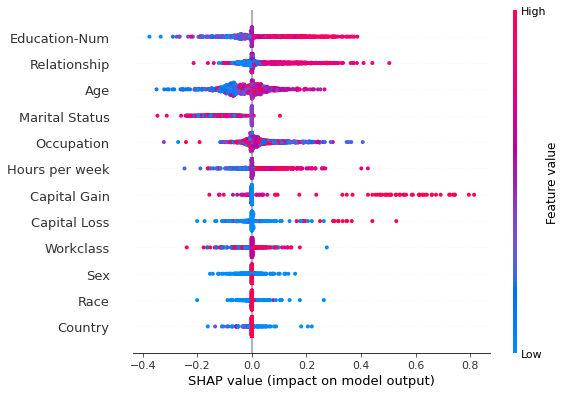

In [23]:
shap.summary_plot(shap_values, X_valid.iloc[0:1000,:])

In [25]:
shap.Explainer.__dict__.keys()

dict_keys(['__module__', '__doc__', '__init__', '__call__', 'explain_row', 'supports_model_with_masker', '_compute_main_effects', 'save', 'load'])

In [48]:
explainer = shap.Explainer(f, med)
shap_values_2 = explainer(X_valid.iloc[0:1,:])

In [54]:
f([X_valid.iloc[0]])

array([0.0045])

In [56]:
help(explainer.explain_row)

Help on method explain_row in module shap.explainers._permutation:

explain_row(*row_args, max_evals, main_effects, error_bounds, batch_size, outputs, silent) method of shap.explainers._permutation.Permutation instance
    Explains a single row and returns the tuple (row_values, row_expected_values, row_mask_shapes).



In [55]:
explainer.explain_row(0)

TypeError: explain_row() missing 6 required keyword-only arguments: 'max_evals', 'main_effects', 'error_bounds', 'batch_size', 'outputs', and 'silent'

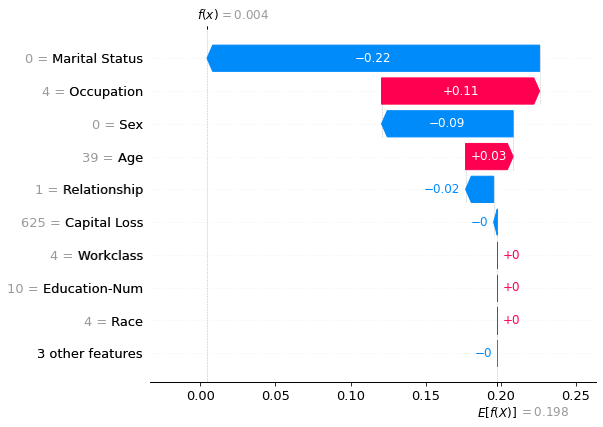

In [51]:
shap.plots.waterfall(shap_values_2[0])